# ESDA

In [1]:
pip install esda

Note: you may need to restart the kernel to use updated packages.


#### To solve a version error with numpy to import esda, remove it and reinstall

In [2]:
pip uninstall numpy

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\cg\alpha_shapes.py:199: N

In [3]:
gdf = gpd.read_file("C:/Users/ehdwn/OneDrive/바탕 화면/python/esda/berlin-neighbourhoods.geojson")

In [28]:
neighbourhood_group = gdf.neighbourhood_group

<Axes: >

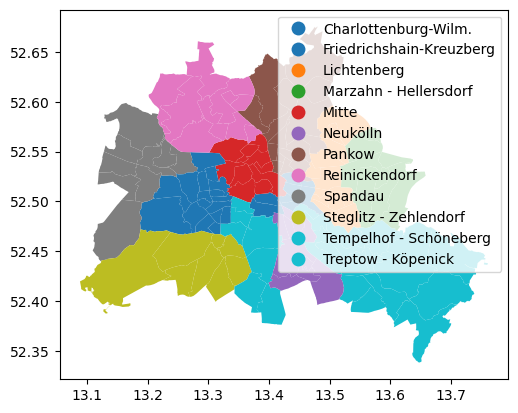

In [68]:
gdf.plot(column = 'neighbourhood_group', legend = 'True')

In [6]:
bl_df = pd.read_csv("C:/Users/ehdwn/OneDrive/바탕 화면/python/esda/berlin-listings.csv.gz")

### Display every columns of dataframe

In [69]:
#pd.set_option('display.max_columns', None) 

#print(bl_df)

As can be seen above, there are longitude and latitude in columns of "bl_df"

Making geodataframe from dataframe by adding geometry

In [8]:
geometry = [Point(xy) for xy in zip(bl_df.longitude, bl_df.latitude)]
crs = {'init': 'epsg:4326'}

#Create a new variable called 'bl_gdf'
bl_gdf = GeoDataFrame(bl_df, crs=crs, geometry=geometry)

c:\Users\ehdwn\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


As can be seen above, I made an object which is point by using a function 'zip' with .longitude and .latitude to make a new series called geometry. 

In [24]:
bl_gdf

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,geometry
0,0,17260587,https://www.airbnb.com/rooms/17260587,20170507222235,2017-05-08,Kunterbuntes Zimmer mit eigenem Bad für jedermann,"Meine Unterkunft ist gut für paare, alleinreis...",NaN,"Meine Unterkunft ist gut für paare, alleinreis...",none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/4e3ca459-f...,https://a0.muscache.com/im/pictures/4e3ca459-f...,https://a0.muscache.com/im/pictures/4e3ca459-f...,https://a0.muscache.com/im/pictures/4e3ca459-f...,110413588,https://www.airbnb.com/users/show/110413588,Julia,2017-01-08,DE,NaN,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/79cb5050-e...,https://a0.muscache.com/im/pictures/79cb5050-e...,Niederschönhausen,3.0,3.0,"['email', 'phone', 'reviews']",t,f,"Niederschönhausen, Berlin, Berlin 13156, Germany",Niederschönhausen,Blankenfelde/Niederschönhausen,Pankow,Berlin,Berlin,13156,Berlin,"Berlin, Germany",DE,Germany,52.583306,13.396092,t,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{""Wireless Internet"",Kitchen,""Family/kid frien...",NaN,30.0,NaN,NaN,NaN,NaN,1,$5.00,2,6,yesterday,NaN,10,18,34,44,2017-05-08,2,2017-04-16,2017-05-03,100.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,NaN,t,flexible,f,f,3,2.00,POINT (13.39609 52.58331)
1,1,17227881,https://www.airbnb.com/rooms/17227881,20170507222235,2017-05-08,Modernes Zimmer in Berlin Pankow,Es ist ein schönes gepflegtes und modernes Zim...,Das Haus befindet sich direkt vor eine Tram Ha...,Es ist ein schönes gepflegtes und modernes Zim...,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/ee368c87-d...,https://a0.muscache.com/im/pictures/ee368c87-d...,https://a0.muscache.com/im/pictures/ee368c87-d...,https://a0.muscache.com/im/pictures/ee368c87-d...,116030782,https://www.airbnb.com/users/show/116030782,Jessica,2017-02-12,DE,NaN,within an hour,90%,NaN,f,https://a0.muscache.com/im/pictures/ff780729-2...,https://a0.muscache.com/im/pictures/ff780729-2...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Berlin, Berlin 13156, Germany",NaN,Blankenfelde/Niederschönhausen,Pankow,Berlin,Berlin,13156,Berlin,"Berlin, Germany",DE,Germany,52.576417,13.398582,f,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,""Free parking on ...",NaN,17.0,NaN,NaN,NaN,$5.00,1,$10.00,1,17,4 weeks ago,NaN,0,3,3,36,2017-05-08,3,2017-02-28,2017-03-22,80.0,9.0,9.0,9.0,9.0,8.0,10.0,f,NaN,NaN,t,flexible,f,f,1,1.29,POINT (13.39858 52.57642)
2,2,1153584,https://www.airbnb.com/rooms/1153584,20170507222235,2017-05-08,Gästezimmer Berlin-Pankow,Unser Gästezimmer befindet sich im Dachgeschos...,"Wenn Ihr eine ansp

In [10]:
bl_gdf['price'] = bl_gdf['price'].astype('float32')
#make a new column called 'price' 
sj_gdf = gpd.sjoin(gdf, bl_gdf, how='inner', op='intersects', lsuffix='left', rsuffix='right')
#spatial join of two geodataframe gdf and bl_gdf 
median_price_gb = sj_gdf['price'].groupby([sj_gdf['neighbourhood_group']]).mean()
#align a column 'price' grouped by 'neighbourhood_group' and calculate mean of their price
median_price_gb

c:\Users\ehdwn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\ehdwn\AppData\Local\Temp\ipykernel_1212\4034588418.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  sj_gdf = gpd.sjoin(gdf, bl_gdf, how='inner', op='intersects', lsuffix='left', rsuffix='right')


neighbourhood_group
Charlottenburg-Wilm.        58.556408
Friedrichshain-Kreuzberg    55.492809
Lichtenberg                 44.584270
Marzahn - Hellersdorf       54.246754
Mitte                       60.387890
Neukölln                    45.135948
Pankow                      60.282516
Reinickendorf               43.682465
Spandau                     48.236561
Steglitz - Zehlendorf       54.445683
Tempelhof - Schöneberg      53.704407
Treptow - Köpenick          51.222004
Name: price, dtype: float32

Creating a new column in gdf called 'median_pri' by using 'join' function

In [11]:
gdf = gdf.join(median_price_gb, on='neighbourhood_group')
gdf.rename(columns={'price': 'median_pri'}, inplace=True)
gdf.head(15)

,neighbourhood,neighbourhood_group,geometry,median_pri
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...",60.282516
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...",60.282516
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...",58.556408
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...",51.222004
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...",51.222004
5,Biesdorf,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.56643 52.53510, 13.56697 52...",54.246754
6,Nord 1,Reinickendorf,"MULTIPOLYGON (((13.33669 52.62265, 13.33663 52...",43.682465
7,West 5,Reinickendorf,"MULTIPOLYGON (((13.28138 52.59958, 13.28158 52...",43.682465
8,Frankfurter Allee Nord,Friedrichshain-Kreuzberg,"MULTIPOLYGON (((13.45320 52.51682, 13.45321 52...",55.492809
9,Buch,Pankow,"MULTIPOLYGON (((13.46449 52.65055, 13.46457 52...",60.282516


remove columns in geodataframe

In [12]:
#gdf = gdf.drop(columns='median_pri')
#gdf.head()

I need to check if there is none or not in the column 'median_pri', therefore I will use 'isnull' from pandas

In [13]:
pd.isnull(gdf['median_pri']).sum()

2

In [14]:
gdf['median_pri'].fillna((gdf['median_pri'].mean()), inplace=True)
gdf.head(15)

,neighbourhood,neighbourhood_group,geometry,median_pri
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...",60.282516
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...",60.282516
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...",58.556408
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...",51.222004
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...",51.222004
5,Biesdorf,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.56643 52.53510, 13.56697 52...",54.246754
6,Nord 1,Reinickendorf,"MULTIPOLYGON (((13.33669 52.62265, 13.33663 52...",43.682465
7,West 5,Reinickendorf,"MULTIPOLYGON (((13.28138 52.59958, 13.28158 52...",43.682465
8,Frankfurter Allee Nord,Friedrichshain-Kreuzberg,"MULTIPOLYGON (((13.45320 52.51682, 13.45321 52...",55.492809
9,Buch,Pankow,"MULTIPOLYGON (((13.46449 52.65055, 13.46457 52...",60.282516


As seen above, the two none values are replaced by median values 52.735874

<Axes: >

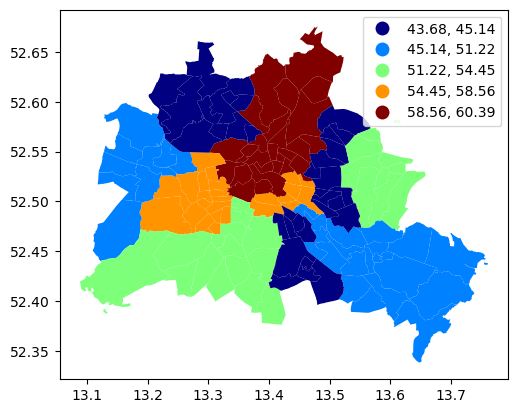

In [32]:
gdf.plot(column='median_pri', scheme='Quantiles', k=5, cmap='jet', legend=True)

More detailed work

<Axes: >

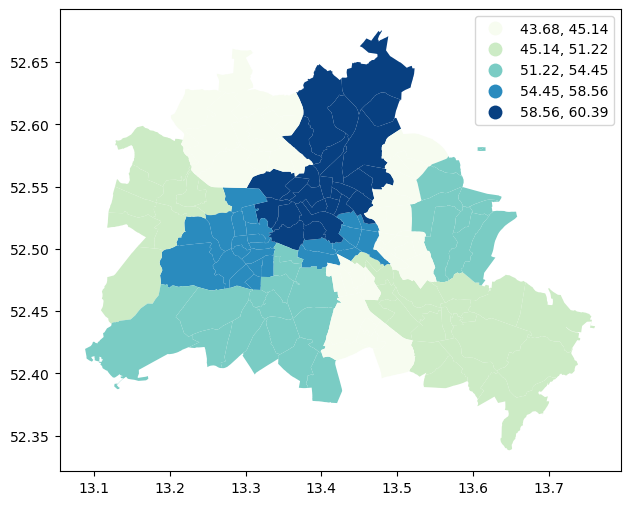

In [39]:
fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'aspect':'equal'})
gdf.plot(column='median_pri', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax)

## Spatial Autocorrelation

__Spatial Autocorrelation__: the presence of systematic spatial variation in a mapped variable where adjacent observations have similar data values

### Spatial Similarity
Define spatial weights by using queen contiguity.
In terms of the weight metrix, it indicates the strength of the spatial relationship between two locations.
For example, two locations are neighbors (Queen contiguity = they share at least one edge or vertex). 
If there is a connection then =1, otherwise = 0.

Weight Matrix for Queen Contiguity:

        A   B   C   D
    A   0   1   0   0
    B   1   0   1   0
    C   0   1   0   1
    D   0   0   1   0

In this example, the weight matrix indicates the spatial relationships between the locations A, B, C, and D. For Queen contiguity, a value of 1 indicates that two locations are neighbors, and a value of 0 indicates no connection. For instance, location A and location B are neighbors, as well as location B and location C, but location A and location C are not neighbors.



In [36]:
df = gdf
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


### Attribute Similarity
In terms of attribute similarity in spatial analysis, the "spatial lag" refers to a concept used to quantify the spatial autocorrelation of a particular attribute across a geographic space. It is a way to assess how similar the attribute values of neighboring locations are to each other.
#### Spatial Lag - Model
ylagi = sum of j wij * yj

In [37]:
y = df['median_pri']
ylag = lps.weights.lag_spatial(wq, y)
ylag

array([56.9625061 , 60.28251648, 56.37749926, 51.22200394, 51.22200394,
       50.52180099, 43.6824646 , 45.63422012, 52.65491422, 60.28251648,
       53.64180374, 52.73587418, 52.73587418, 56.47182541, 47.83247757,
       58.58870177, 60.33520317, 59.60296903, 60.38788986, 60.02159348,
       51.80624199, 57.94034958, 52.84482813, 53.40314266, 57.90522512,
       60.28251648, 60.28251648, 55.79730334, 56.79401737, 50.81182589,
       59.01427841, 60.29756982, 60.28251648, 50.86356888, 60.3220315 ,
       60.28251648, 55.48057556, 54.42881557, 60.32466583, 59.50179418,
       54.42846909, 58.55640793, 58.55640793, 57.73426285, 57.47818544,
       57.74774106, 56.13040733, 48.23656082, 48.23656082, 53.74621709,
       55.11957245, 45.95951271, 51.67650986, 54.1985906 , 51.45368042,
       52.36880302, 54.44568253, 54.44568253, 50.84825389, 56.50104523,
       53.92108345, 55.9956289 , 50.49590378, 49.14499828, 48.61369433,
       49.70049   , 49.32550866, 51.22200394, 51.22200394, 47.80

### Display more detailed plots with spatial autocorrelation

In [55]:
import mapclassify as mc 
#mapclassify is intended to be used with visualizaiton packages to handle the actual rendering of the choropleth maps defined on its classifiers
ylagq5 = mc.Quantiles(ylag, k=5) 
#create a new variable using ylag(spatial lag) with k=5


#### f, ax = plt.subplots(1, figsize=(9, 9)) 
This line of code creates a new Matplotlib figure (f) and a set of subplots (ax). The figsize=(9, 9) which is 9 inches by 9 inches.

#### df.assign 
means adding a new column to DataFrame and .plot is for creating a choropleth map

#### ax.set_axis_off()
It means removing axis to make clearer visualization

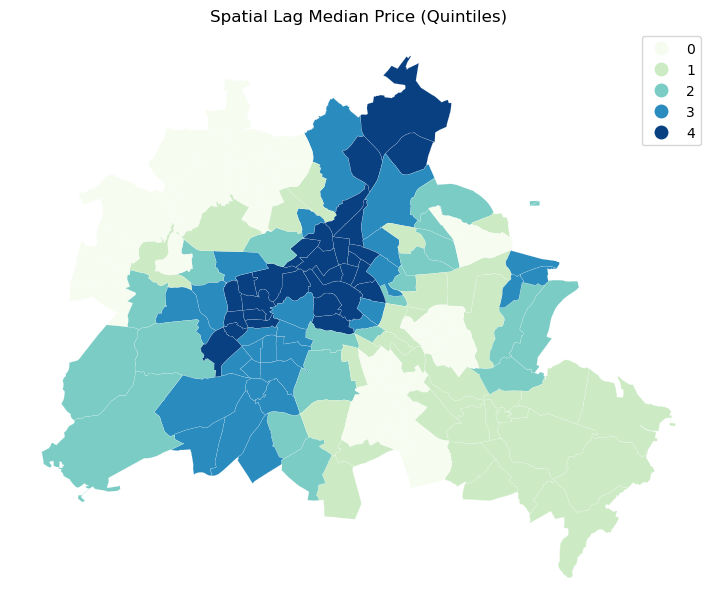

In [50]:

f, ax = plt.subplots(1, figsize=(9, 9)) 
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Median Price (Quintiles)")

plt.show()

## Compare two maps

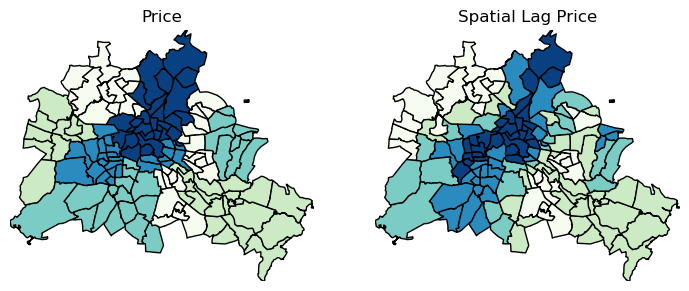

In [58]:
df['lag_median_pri'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
# f, ax = plt.subplots(1, 2, figsize=(2.16*4, 4)): This line of code creates a new Matplotlib figure (f) and two subplots (ax). 
# The 1, 2 argument specifies that the subplots should be arranged in one row and two columns. 
# The figsize=(2.16*4, 4) parameter sets the size of the figure, which is 4 times wider than the default width and 4 inches in height.
df.plot(column='median_pri', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
# The ax=ax[0] parameter specifies that the plot will be drawn on the first subplot (ax[0]). 
# The scheme="quantiles" parameter indicates that the data will be classified into quantiles for coloring.
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
# The axis() method takes four parameters representing the limits for the x-axis and y-axis, respectively.
# The total_bounds attribute of a GeoDataFrame returns a tuple representing the minimum and maximum values of the x and y coordinates.
# The NumPy array np.asarray([0,2,1,3]) creates a new array with elements [0, 2, 1, 3]./
# This array specifies the order of the coordinates in the bounding box, namely xmin, ymin, xmax, ymax.
ax[0].set_title("Price")
#2nd plot
df.plot(column='lag_median_pri', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Price")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [54]:
df #['median_pri'] = just normal price, by the way ['lag_median_pri'] = price with spatial autocorrelation

,neighbourhood,neighbourhood_group,geometry,median_pri,lag_median_pri
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...",60.282516,56.962506
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...",60.282516,60.282516
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...",58.556408,56.377499
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...",51.222004,51.222004
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...",51.222004,51.222004
...,...,...,...,...,...
135,Hellersdorf-Ost,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.62135 52.52704, 13.62079 52...",54.246754,54.246754
136,Mahlsdorf,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.65554 52.52982, 13.65693 52...",54.246754,53.238504
137,Ost 1,Reinickendorf,"MULTIPOLYGON (((13.36666 52.55823, 13.36561 52...",43.682465,56.185190
138,Ost 2,Reinickendorf,"MULTIPOLYGON (((13.36418 52.56298, 13.36423 52...",43.682465,49.233377


However, we still have the challenge of visually associating the value of the prices in a neighborhod with the value of the spatial lag of values for the focal unit. The latter for example is a weighted average of homicide rates in the focal county’s neighborhood.

## Global Spatial Autocorrelation

### Binary case

In [70]:
y.median()
# y=df['median_pri']

53.70440673828125

In [71]:
yb = y > y.median()
yb.sum()

68

In [72]:
yb = y > y.median()
# If a value in 'y' is greater than the median value, the corresponding element in 'yb' will be True; otherwise, it will be False.
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb]
# each element is replaced with the corresponding label from the 'labels' list based on the value in 'yb'. 
# If the value in 'yb' is True, it corresponds to the label "1 High" (index 1 in the 'labels' list), 
# and if the value is False, it corresponds to the label "0 Low" (index 0 in the 'labels' list).
df['yb'] = yb #Put them in a column ['yb']

In [73]:
df

,neighbourhood,neighbourhood_group,geometry,median_pri,lag_median_pri,yb
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...",60.282516,56.962506,1 High
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...",60.282516,60.282516,1 High
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...",58.556408,56.377499,1 High
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...",51.222004,51.222004,0 Low
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...",51.222004,51.222004,0 Low
...,...,...,...,...,...,...
135,Hellersdorf-Ost,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.62135 52.52704, 13.62079 52...",54.246754,54.246754,1 High
136,Mahlsdorf,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.65554 52.52982, 13.65693 52...",54.246754,53.238504,1 High
137,Ost 1,Reinickendorf,"MULTIPOLYGON (((13.36666 52.55823, 13.36561 52...",43.682465,56.185190,0 Low
138,Ost 2,Reinickendorf,"MULTIPOLYGON (((13.36418 52.56298, 13.36423 52...",43.682465,49.233377,0 Low


<Axes: >

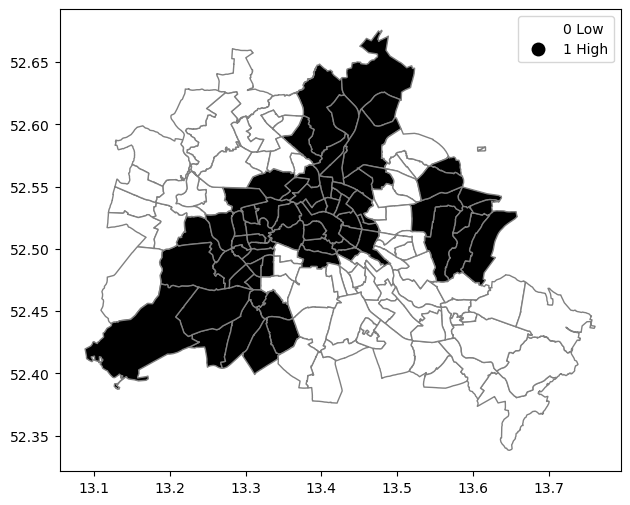

In [79]:
fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'aspect':'equal'})
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)
#68 black polygons

<Axes: >

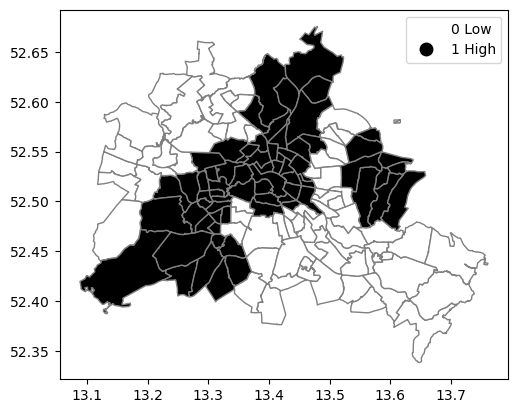

In [80]:
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True)

### Join counts
One way to formalize a test for spatial autocorrelation in a binary attribute is to consider the so-called joins. A join exists for each neighbor pair of observations, and the joins are reflected in our binary spatial weights object wq.

Each unit can take on one of two values “Black” or “White”, and so for a given pair of neighboring locations there are three different types of joins that can arise:

    Black Black (BB)

    White White (WW)

    Black White (or White Black) (BW)

Given that we have 68 Black polygons on our map, what is the number of Black Black (BB) joins we could expect if the process were such that the Black polygons were randomly assigned on the map? This is the logic of join count statistics.

In [85]:
import esda
yb = 1 * (y > y.median()) # convert back to binary
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'b'#boolean
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [88]:
jc.bb, jc.ww, jc.bw

(164.0, 149.0, 73.0)

In [90]:
jc.mean_bb

90.70170170170171

C:\Users\ehdwn\AppData\Local\Temp\ipykernel_1212\3375616935.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(jc.sim_bb, shade=True)


Text(0.5, 0, 'BB Counts')

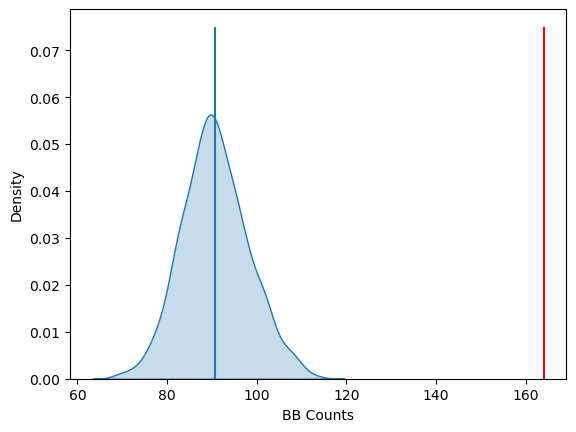

In [91]:
import seaborn as sbn
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 0.075, color='r')
plt.vlines(jc.mean_bb, 0,0.075)
plt.xlabel('BB Counts')

In [92]:
jc.p_sim_bb #p-value, It's extreamly high bcs 0.05 is the conventional significant level. Hence, i would reject it(null hypothesis).

0.001

### Continuous Case

### Moran's I    
to assess the degree of spatial clustering or dispersion of a variable across geographic locations.

    A positive value (close to +1) indicates spatial clustering, meaning that areas with similar attribute values tend to be clustered together on the map.
    A negative value (close to -1) indicates spatial dispersion, meaning that areas with similar attribute values tend to be dispersed or interspersed with areas of dissimilar values.
    A value close to 0 suggests a lack of spatial autocorrelation, indicating no significant spatial pattern of similarity or dissimilarity in the variable.

In [93]:
wq.transform = 'r' #row standardization
y = df['median_pri']

In [101]:
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I, mi.EI

(0.6563069331330269, -0.007194244604316547)

Positive value which means quite clustered, but i need to compare it by visualizing them in a plot

C:\Users\ehdwn\AppData\Local\Temp\ipykernel_1212\2058236579.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(mi.sim, shade=True)


Text(0.5, 0, "Moran's I")

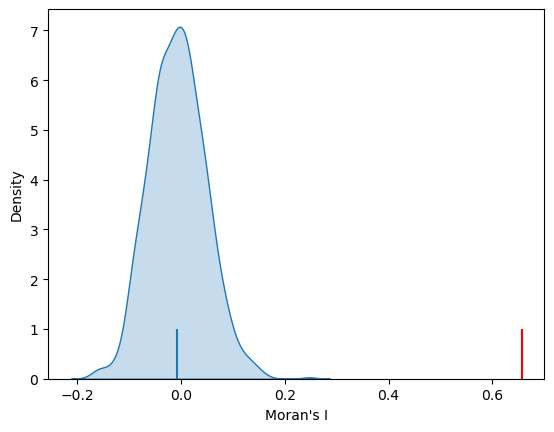

In [95]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r') 
#Create a vertical red line. 
#The variable mi.I contains the actual Moran's I statistic calculated from the real data.
plt.vlines(mi.EI, 0,1)
#The variable mi.EI represents the expected value of Moran's I under the assumption of spatial randomness. 
#It is the mean value of the Moran's I statistics obtained from the simulated data.
plt.xlabel("Moran's I")

In [102]:
mi.p_sim #Still significantly high

0.001

## Local Autocorrelation: Hot Spots, Cold Spots, and Spatial Outliers

In [113]:
np.random.seed(12345)
import esda

In [114]:
wq.transform = 'r'
lag_price = lps.weights.lag_spatial(wq, df['median_pri'])

### np.random.seed(12345)
Create predictable random numbers. If i set same seeds, then i will obtain the same results. Otherwise, i will get different results.

In [118]:
#np.random.seed(12345)
#np.random.randint(100, size = 5)

array([98, 29,  1, 36, 41])

In [119]:
#np.random.seed(12345)
#np.random.randint(100, size = 5)

array([98, 29,  1, 36, 41])

In [120]:
#np.random.seed(123)
#np.random.randint(100, size = 5)

array([66, 92, 98, 17, 83])

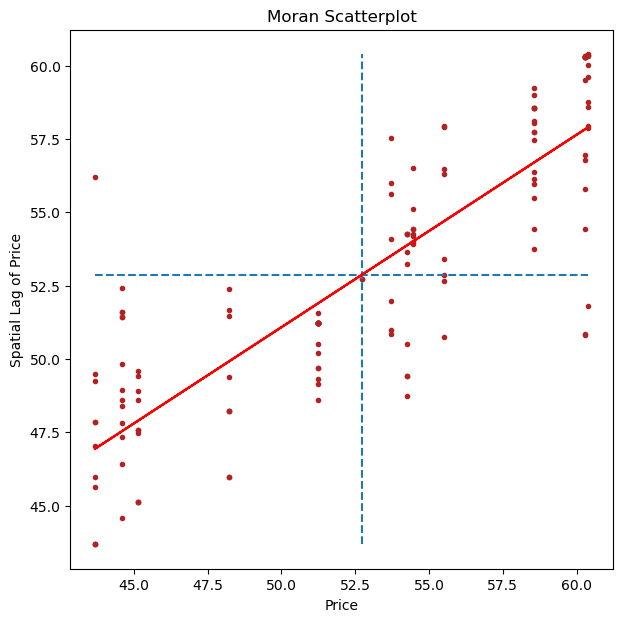

In [124]:
price = df['median_pri']
b, a = np.polyfit(price, lag_price, 1)
f, ax = plt.subplots(1, figsize=(7, 7))

plt.plot(price, lag_price, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_price.mean(), price.min(), price.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Price')
plt.xlabel('Price')
plt.show()

In [157]:
li = esda.moran.Moran_Local(y, wq)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<intrinsic _impl>) found for signature:
 
 >>> _impl(array(float32, 2d, C), array(float64, 1d, C))
 
There are 2 candidate implementations:
[1m  - Of which 2 did not match due to:
  Intrinsic in function 'dot_2_impl.<locals>._impl': File: numba\np\linalg.py: Line 543.
    With argument(s): '(array(float32, 2d, C), array(float64, 1d, C))':[0m
[1m   Rejected as the implementation raised a specific error:
     TypingError: [1m'@' arguments must all have the same dtype[0m[0m
  raised from c:\Users\ehdwn\anaconda3\lib\site-packages\numba\np\linalg.py:563
[0m
[0m[1mDuring: resolving callee type: Function(<intrinsic _impl>)[0m
[0m[1mDuring: typing of call at c:\Users\ehdwn\anaconda3\lib\site-packages\numba\np\linalg.py (582)
[0m
[1m
File "..\..\..\..\anaconda3\lib\site-packages\numba\np\linalg.py", line 582:[0m
[1m            def _dot2_codegen(context, builder, sig, args):
                <source elided>

[1m        return lambda left, right: _impl(left, right)
[0m        [1m^[0m[0m

[0m[1mDuring: typing of intrinsic-call at c:\Users\ehdwn\anaconda3\lib\site-packages\esda\moran.py (1820)[0m
[1m
File "..\..\..\..\anaconda3\lib\site-packages\esda\moran.py", line 1820:[0m
[1mdef _moran_local_crand(i, z, permuted_ids, weights_i, scaling):
    <source elided>
    zi, zrand = _prepare_univariate(i, z, permuted_ids, other_weights)
[1m    return zi * (zrand @ other_weights + self_weight * zi) * scaling
[0m    [1m^[0m[0m

[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function _moran_local_crand at 0x0000017532A90A60>))[0m
[0m[1mDuring: typing of call at c:\Users\ehdwn\anaconda3\lib\site-packages\esda\crand.py (334)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function _moran_local_crand at 0x0000017532A90A60>))[0m
[0m[1mDuring: typing of call at c:\Users\ehdwn\anaconda3\lib\site-packages\esda\crand.py (334)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function _moran_local_crand at 0x0000017532A90A60>))[0m
[0m[1mDuring: typing of call at c:\Users\ehdwn\anaconda3\lib\site-packages\esda\crand.py (334)
[0m
[1m
File "..\..\..\..\anaconda3\lib\site-packages\esda\crand.py", line 334:[0m
[1mdef compute_chunk(
    <source elided>
        ]
[1m        rstats = stat_func(chunk_start + i, z, permuted_ids, weights_i, scaling)
[0m        [1m^[0m[0m


In [156]:
import esda, libpysal, numpy
for package in [esda, libpysal, numpy]:
    print(f"{package.__name__}: {package.__version__}")

esda: 2.4.3
libpysal: 4.7.0
numpy: 1.24.3
